<a href="https://colab.research.google.com/github/Jul-Summer/ML/blob/main/MATH_ML_2__%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [35]:
# Импорт библиотек
import pandas as pd  # Работа с таблицами
import numpy as np  # Математические операции
import matplotlib.pyplot as plt  # Визуализация данных
import seaborn as sns  # Улучшенная визуализация
from sklearn.model_selection import train_test_split  # Разделение данных
from sklearn.linear_model import LinearRegression  # Линейная регрессия
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Оценка модели

%matplotlib inline

In [15]:
from google.colab import files
uploaded = files.upload()

Saving unconv.csv to unconv (1).csv


Прочитаем исходные данные:

In [34]:
df = pd.read_csv('unconv.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [36]:
# Ваш код здесь
print(df.info())  # Проверим типы данных
print(df.describe())  # Выведем основные статистики
print(df.isnull().sum())  # Подсчёт пропусков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500  

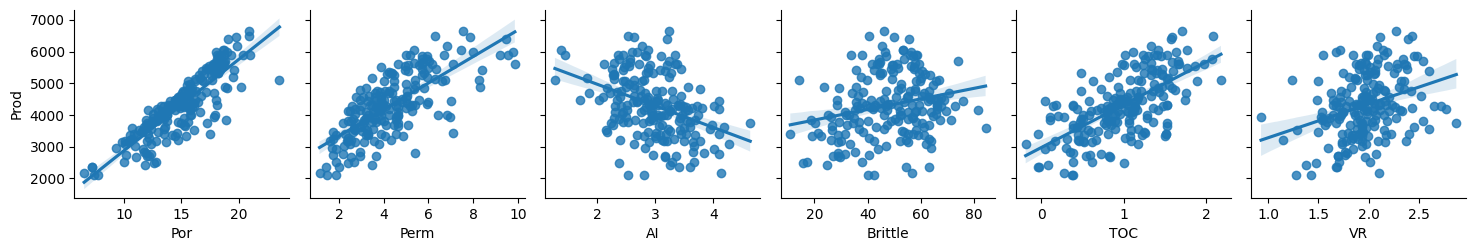

In [38]:
#Визуализируем зависимость Prod от других признаков:
sns.pairplot(df, x_vars=['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], y_vars='Prod', kind='reg')
plt.show()


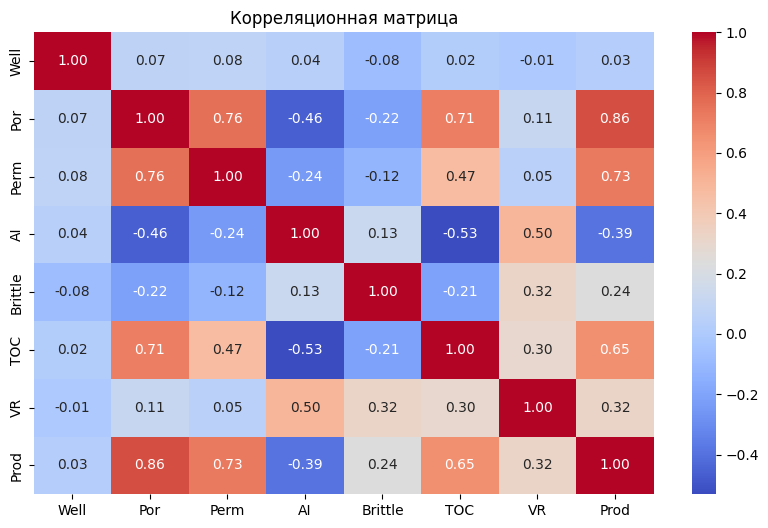

In [39]:
#Построим корреляционную матрицу:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

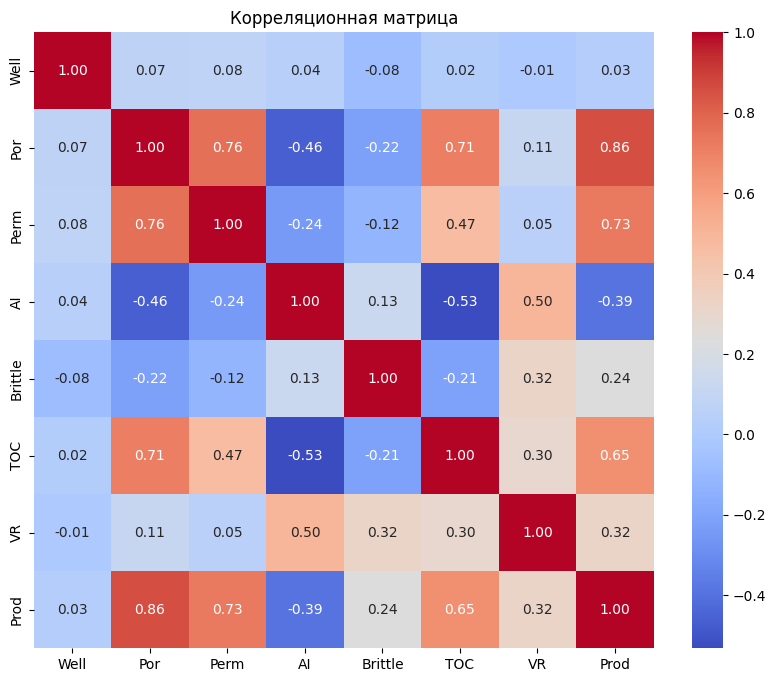

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64


In [40]:
# Ваш код здесь
# Сначала вычислим корреляционную матрицу, включая целевой признак Prod
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv('unconv.csv')

# Создаем корреляционную матрицу
correlation_matrix = df.corr()

# Визуализируем корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Корреляционная матрица')
plt.show()

# Смотрим на корреляции с целевой переменной
print(correlation_matrix['Prod'])




In [41]:
# Ранг матрицы
rank = np.linalg.matrix_rank(correlation_matrix)

# Определитель матрицы
determinant = np.linalg.det(correlation_matrix)

print(f'Ранг корреляционной матрицы: {rank}')
print(f'Определитель корреляционной матрицы: {determinant}')


Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652095


*Ваши выводы здесь*
- Наибольшее влияние на добычу газа оказывает пористость (Por), так как её корреляция с Prod составляет 0.86 — очень высокая.

- Проницаемость (Perm) и содержание органического углерода (TOC) также влияют на добычу, но чуть слабее.

- Акустический импеданс (AI) показывает отрицательную корреляцию с добычей.

- Остальные признаки (например, коэффициент хрупкости Brittle и коэффициент отражения витринита VR) имеют либо слабое, либо очень слабое влияние на добычу.

**Корреляционная матрица является плохо обусловленной, поскольку её определитель 0.00073 очень близок к нулю.Ранг корреляционной матрицы равен 8, что означает, что все признаки имеют некоторую степень независимости.**

- Пористость и проницаемость имеют высокую корреляцию между собой, что может указывать на мультиколлинеарность. Это означает, что они могут быть взаимозаменяемыми, что снижает точность предсказаний в линейной регрессии.

**Применение классической линейной регрессии методом наименьших квадратов в данном случае затруднено из-за мультиколлинеарности.**

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

## Построим модель линейной регрессии вручную через метод наименьших квадратов.

In [42]:
# Ваш код здесь

# Подготовим матрицу факторов X и целевой признак Y.
# Определяем целевой признак
Y = df["Prod"].values.reshape(-1, 1)

# Выбираем факторы (без целевой переменной)
X = df.drop(columns=["Prod"]).values

# Добавляем единичный столбец для свободного члена (Intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Вычисляем коэффициенты по методу наименьших квадратов
beta = np.linalg.inv(X.T @ X) @ X.T @ Y   # в этом фрагменте наша модель обучаеться

# Округляем коэффициенты до целого
beta_rounded = np.round(beta)

# Выводим результат
print("Коэффициенты модели (округленные):")
print(beta_rounded)



Коэффициенты модели (округленные):
[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


> *Ваши выводы здесь*
- Теперь у нас есть значения β, которые можно использовать для предсказаний.
- Полученные коэффициенты модели — это параметры, которые были найдены в ходе обучения линейной регрессии. Эти коэффициенты показывают, какое влияние каждый из признаков оказывает на целевую переменную (в данном случае, на выработку газа Prod).
- Эти коэффициенты можно использовать для построения предсказаний добычи газа для новых данных скважин, подставляя значения признаков в уравнение модели.
- Полученные коэффициенты модели линейной регрессии: означают, что линейная модель, построенная на основе данных, может быть записана как: − 1230 — свободный член (intercept), значение целевой переменной (в данном случае, добычи газа), когда все признаки равны нулю.
- Первый коэффициент при первом факторе (Well) оказался близок к нулю после обучения и округлился. Значит, этот признак практически не влияет на предсказание в  модели.
- Признаки пористость (Por) и проницаемость (Perm) имеют сильное положительное влияние на выработку газа ; 230 — коэффициент перед пористостью (Por),​ 116 — коэффициент перед проницаемостью (Perm);
- Акустический импеданс (AI) и общее содержание органического углерода (TOC) оказывают отрицательное влияние на выработку;-230(AI) , -77(TOC)
- Признаки коэффициент хрупкости (Brittle) и коэффициент отражения витринита (VR) также оказывают влияние, но по меньшей ; 25(Brittle), 783(VR).

**Некоторые из этих коэффициентов могут быть полезными для дальнейшей оптимизации и улучшения работы скважин.**

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [43]:
# Ваш код здесь
# Данные для скважины
well_data = np.array([[1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])  # Добавляем единичный столбец для intercept

# Прогнозируем для данной скважины
predicted_prod = well_data @ beta

# Истинное значение (дано в задаче)
true_prod = 4748.315024

# Абсолютная ошибка
abs_error = abs(true_prod - predicted_prod)
print(f"Прогнозируемая выработка газа для скважины: {predicted_prod[0][0]}")
print(f"Абсолютная ошибка: {abs_error[0]}")



Прогнозируемая выработка газа для скважины: 4723.064053707485
Абсолютная ошибка: [25.25097029]


In [48]:
# Предсказания для всего набора данных
Y_pred = X @ beta

# MAE
mae = np.mean(np.abs(Y - Y_pred))

# RMSE
rmse = np.sqrt(np.mean((Y - Y_pred)**2))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 153.62297086555168
RMSE: 198.28020612321944


> *Ваши выводы здесь*

- Прогноз: выработка газа на скважине, предсказанная моделью, составляет 4723.06 млн куб. футов, что близко к истинному значению (4748.32 млн куб. футов).

- Абсолютная ошибка: Ошибка в предсказании составляет 25.25 млн куб. футов в день, что означает, что модель отклонилась от реального значения на 25.25 миллионов кубических футов.

- MAE в 153.62 млн куб. футов в день говорит о том, что в среднем модель достаточно точно предсказывает выработку газа, но все равно имеется ошибка порядка 153.62 млн куб. футов для каждой скважины.

- RMSE в 198.28 млн куб. футов в день говорит о том, что ошибки, особенно крупные, оказывают значительное влияние на качество модели.

*Если сравнивать эти метрики с теми, что мы получили для конкретной скважины, то видим, что модель может работать лучше на некоторых скважинах, чем в целом по всем данным.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

## Сравнение коэффициентов модели и корреляций

In [45]:
# Ваш код здесь
# Наши коэффициенты модели линейной регрессии (по методу наименьших квадратов) следующие:
coefficients = [
    [-1230.26203694],   # Свободный член
    [230.29581021],     # Por
    [116.2280334],      # Perm
    [-363.73608557],    # AI
    [24.9966698],       # Brittle
    [-77.43674242],     # TOC
    [783.18741348]      # VR
]

# Вывод коэффициентов модели
for idx, coeff in enumerate(coefficients):
    print(f"Коэффициент для фактора {['Свободный член', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'][idx]}: {coeff[0]:.2f}")



Коэффициент для фактора Свободный член: -1230.26
Коэффициент для фактора Por: 230.30
Коэффициент для фактора Perm: 116.23
Коэффициент для фактора AI: -363.74
Коэффициент для фактора Brittle: 25.00
Коэффициент для фактора TOC: -77.44
Коэффициент для фактора VR: 783.19


In [95]:
# Корреляционные коэффициенты между факторами и целевой переменной (Prod) были следующими:
import pandas as pd

# Создание данных для таблицы
data = {
    "Фактор": ["Por", "Perm", "AI", "Brittle", "TOC", "VR"],
    "Корреляция с Prod": [0.861910, 0.727426, -0.390835, 0.237155, 0.654445, 0.323182]
}

# Создание DataFrame
correlation_table = pd.DataFrame(data)

# Вывод таблицы
#print(correlation_table)

#from IPython.display import display

# Отображение таблицы
display(correlation_table)


,Фактор,Корреляция с Prod
0,Por,0.861910
1,Perm,0.727426
2,AI,-0.390835
3,Brittle,0.237155
4,TOC,0.654445
5,VR,0.323182


In [47]:
import pandas as pd
import numpy as np

# Данные корреляции с целевой переменной
correlations = {
    'Por': 0.861910,
    'Perm': 0.727426,
    'AI': -0.390835,
    'Brittle': 0.237155,
    'TOC': 0.654445,
    'VR': 0.323182
}

# Коэффициенты модели линейной регрессии
coefficients = np.array([
    [-1230.26203694],   # Свободный член
    [230.29581021],     # Por
    [116.2280334],      # Perm
    [-363.73608557],    # AI
    [24.9966698],       # Brittle
    [-77.43674242],     # TOC
    [783.18741348]      # VR
])

# Преобразуем коэффициенты в одномерный массив (для упрощения)
coefficients = coefficients.flatten()

# Создание DataFrame для сравнения
comparison = pd.DataFrame({
    "Correlation": correlations.values(),
    "Regression Coefficient": coefficients[1:],  # Убираем первый коэффициент, так как это свободный член
}, index=correlations.keys())

# Добавляем столбец для сравнения знаков
comparison["Sign Match"] = np.sign(comparison["Correlation"]) == np.sign(comparison["Regression Coefficient"])

# Выводим результат
print(comparison)


         Correlation  Regression Coefficient  Sign Match
Por         0.861910              230.295810        True
Perm        0.727426              116.228033        True
AI         -0.390835             -363.736086        True
Brittle     0.237155               24.996670        True
TOC         0.654445              -77.436742       False
VR          0.323182              783.187413        True


> *Ваши выводы здесь*
- TOC — это единственный фактор, для которого наблюдается противоречие: корреляция с целевой переменной положительная, а коэффициент модели отрицательный. Это может быть связано с многоколлинеарностью или другими взаимодействиями факторов, которые трудно учесть в линейной модели.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [49]:
import pandas as pd
import numpy as np

# Чтение данных
df = pd.read_csv('unconv.csv')

# Вычисляем корреляционную матрицу
corr_matrix = df.corr()

# 1. Отбираем признаки, корреляция которых с 'Prod' по модулю не меньше 0.05 (исключая 'Prod')
initial_features = [col for col in df.columns if col != 'Prod' and abs(corr_matrix.loc[col, 'Prod']) >= 0.05]

# 2. Из сильно коррелированных признаков (> 0.7) оставляем тот, который сильнее коррелирует с 'Prod'
features_to_drop = set()
n = len(initial_features)
for i in range(n):
    for j in range(i + 1, n):
        feat_i = initial_features[i]
        feat_j = initial_features[j]
        # Если взаимная корреляция между признаками превышает 0.7
        if abs(corr_matrix.loc[feat_i, feat_j]) > 0.7:
            # Сравниваем абсолютные значения корреляции с 'Prod'
            corr_i = abs(corr_matrix.loc[feat_i, 'Prod'])
            corr_j = abs(corr_matrix.loc[feat_j, 'Prod'])
            if corr_i >= corr_j:
                features_to_drop.add(feat_j)
            else:
                features_to_drop.add(feat_i)

# Итоговый набор признаков для модели (без 'Prod')
final_features = [feat for feat in initial_features if feat not in features_to_drop]

# Формируем финальный DataFrame с выбранными признаками и целевой переменной
df_new = df[final_features + ['Prod']]

print("Обновленные данные:")
print(df_new.head())


Обновленные данные:
     Por    AI  Brittle    VR         Prod
0  12.08  2.80    81.40  2.31  4165.196191
1  12.38  3.22    46.17  1.88  3561.146205
2  14.02  4.01    72.80  2.72  4284.348574
3  17.67  2.63    39.81  1.88  5098.680869
4  17.52  3.18    10.94  1.90  3406.132832


In [50]:
import numpy as np
import pandas as pd

# Предполагается, что df_new уже сформирован согласно предыдущему коду,
# и содержит итоговые признаки и целевую переменную 'Prod'

# Разбиваем данные на признаки (X) и целевую переменную (y)
final_features = df_new.columns.drop('Prod')
X = df_new[final_features].values
y = df_new['Prod'].values.reshape(-1, 1)

# Добавляем столбец единиц для свободного члена (интерсепта)
X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

# Вычисляем коэффициенты по формуле МНК с использованием псевдообратной матрицы
theta = np.linalg.pinv(X_intercept.T @ X_intercept) @ X_intercept.T @ y

# Делаем прогноз для всего обучающего набора
y_pred = X_intercept @ theta

# Рассчитываем метрику MAE (Mean Absolute Error)
MAE = np.mean(np.abs(y - y_pred))

# Рассчитываем метрику RMSE (Root Mean Squared Error)
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))

print("Коэффициенты линейной регрессии (включая свободный член):")
print(np.round(theta.flatten(), 2))
print("\nMAE:", np.round(MAE, 2))
print("RMSE:", np.round(RMSE, 2))


Коэффициенты линейной регрессии (включая свободный член):
[-1835.45   293.04  -200.03    27.64   517.4 ]

MAE: 171.43
RMSE: 231.65


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

## Проведем анализ и сравнение с результатами ручной реализации.

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Предполагается, что df_new уже сформирован согласно предыдущим шагам и содержит итоговые признаки + 'Prod'
# Определим признаки (X) и целевую переменную (y)
final_features = df_new.columns.drop('Prod')
X = df_new[final_features].values
y = df_new['Prod'].values

# Создаем и обучаем модель линейной регрессии
lr = LinearRegression()
lr.fit(X, y)

# Получаем коэффициенты модели: сначала интерсепт, затем коэффициенты для признаков
# атрибут, рассчитанный во время обучения (intercept_ , lr.coef_)
intercept = lr.intercept_   # cвободный член
coefs = lr.coef_             # коэффициенты регрессии

# Формируем общий вектор коэффициентов, округляем до целых
all_coefs = np.concatenate(([intercept], coefs))
all_coefs_rounded = np.round(all_coefs).astype(int)
print("Коэффициенты модели (sklearn):", all_coefs_rounded)

# Делаем прогноз для всего обучающего набора
y_pred = lr.predict(X)

# Рассчитываем метрики
MAE = mean_absolute_error(y, y_pred)
RMSE = np.sqrt(mean_squared_error(y, y_pred))
print("MAE:", np.round(MAE, 2))
print("RMSE:", np.round(RMSE, 2))


Коэффициенты модели (sklearn): [-1835   293  -200    28   517]
MAE: 171.43
RMSE: 231.65


In [53]:
import pandas as pd
import numpy as np

# Данные
coeff_sklearn = np.array([-1835, 293, -200, 28, 517])
coeff_manual = np.array([-1835.45, 293.04, -200.03, 27.64, 517.4])
mae_sklearn, rmse_sklearn = 171.43, 231.65
mae_manual, rmse_manual = 171.43, 231.65

# Создаем DataFrame с новым именем
comparison_df = pd.DataFrame({
    "Коэффициенты модели (sklearn)": coeff_sklearn,
    "Коэффициенты линейной регрессии": coeff_manual
})

# Добавляем метрики
comparison_df.loc["MAE"] = [mae_sklearn, mae_manual]
comparison_df.loc["RMSE"] = [rmse_sklearn, rmse_manual]

# Вывод таблицы
print(comparison_df)


      Коэффициенты модели (sklearn)  Коэффициенты линейной регрессии
0                          -1835.00                         -1835.45
1                            293.00                           293.04
2                           -200.00                          -200.03
3                             28.00                            27.64
4                            517.00                           517.40
MAE                          171.43                           171.43
RMSE                         231.65                           231.65


> *Ваши выводы здесь*
- Результаты, полученные с помощью sklearn, почти аналогичнц результатам ручной реализации. Это подтверждает, что линейная регрессия из библиотеки sklearn работает корректно и точно, минимальные расхождения могут быть связаны с округлением или точностью вычислений.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [74]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error

# Заменим X и y на наши данные
X = [[12.08, 2.80, 81.40, 2.31],
     [12.38, 3.22, 46.17, 1.88],
     [14.02, 4.01, 72.80, 2.72],
     [17.67, 2.63, 39.81, 1.88],
     [17.52, 3.18, 10.94, 1.90]]
y = [4165.196191, 3561.146205, 4284.348574, 5098.680869, 3406.132832]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерируем полиномиальные признаки третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print('Кол-во полипризнаков :',X_poly.shape[1])

model = LinearRegression()
cv_results = cross_validate(model, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))








Кол-во полипризнаков : 34
MAPE на тренировочных фолдах: 0.00 %
MAPE на валидационных фолдах: 21.68 %


> *Ваши выводы здесь*

- **Linear Regression (обычная линейная регрессия)**
  - После применения полиномиальных признаков третьего порядка, мы получили 34 новых признака;
  - MAPE на train: 0.00% → сильное переобучение!
  - MAPE на test: 21.68% → высокая ошибка на тесте.
- **Без регуляризации модель запомнила данные, но не смогла обобщить.**

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [91]:
from sklearn.linear_model import Lasso

# Подбор alpha для Lasso
lasso_params = {'alpha': np.logspace(-4, 2, 20)}
lasso_model = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
lasso_grid.fit(X_poly, y)

# Оптимальная модель и параметр
lasso_best = lasso_grid.best_estimator_
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Кросс-валидация
cv_results_lasso = cross_validate(lasso_best, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

# Вывод результатов
lasso_train_mape = -cv_results_lasso['train_score'].mean() * 100
lasso_val_mape = -cv_results_lasso['test_score'].mean() * 100

print(f"Lasso Regression:")
print(f"Оптимальное alpha: {best_alpha_lasso}")
print(f"MAPE на тренировочных фолдах: {lasso_train_mape:.2f}%")
print(f"MAPE на валидационных фолдах: {lasso_val_mape:.2f}%")


Lasso Regression:
Оптимальное alpha: 100.0
MAPE на тренировочных фолдах: 2.97%
MAPE на валидационных фолдах: 24.51%


> *Ваши выводы здесь*

- **Lasso (L1-регуляризация)**
  - MAPE на train: 2.97%, test: 24.51% → переобучение, но слабее, чем у Linear Regression.

- **Lasso помогает, но, вероятно, слишком сильно занулило коэффициенты.**


### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):

 * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
 * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
 * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено верно, но не учтено одно из условий (**1 балл**).

- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).



In [92]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, GridSearchCV
import numpy as np

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков (3-я степень)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Подбор alpha для Ridge
ridge_params = {'alpha': np.logspace(-4, 2, 20)}
ridge_model = Ridge(max_iter=10000)
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
ridge_grid.fit(X_poly, y)

# Оптимальная модель и параметр
ridge_best = ridge_grid.best_estimator_
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Кросс-валидация
cv_results_ridge = cross_validate(ridge_best, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

# Вывод результатов
ridge_train_mape = -cv_results_ridge['train_score'].mean() * 100
ridge_val_mape = -cv_results_ridge['test_score'].mean() * 100

print(f"Ridge Regression:")
print(f"Оптимальное alpha: {best_alpha_ridge}")
print(f"MAPE на тренировочных фолдах: {ridge_train_mape:.2f}%")
print(f"MAPE на валидационных фолдах: {ridge_val_mape:.2f}%")


Ridge Regression:
Оптимальное alpha: 100.0
MAPE на тренировочных фолдах: 9.39%
MAPE на валидационных фолдах: 16.79%


> *Ваши выводы здесь*

- **Ridge (L2-регуляризация)**
   - MAPE на train: 9.39%, test: 16.79% → наименьшее переобучение!

- **Ridge лучше сбалансировал модель, хорошо работая на тестовых данных.**

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [93]:
from sklearn.linear_model import ElasticNet

# Подбор alpha и l1_ratio для ElasticNet
elastic_params = {
    'alpha': np.logspace(-4, 2, 20),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elastic_model = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic_model, elastic_params, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
elastic_grid.fit(X_poly, y)

# Оптимальная модель и параметры
elastic_best = elastic_grid.best_estimator_
best_alpha_elastic = elastic_grid.best_params_['alpha']
best_l1_ratio = elastic_grid.best_params_['l1_ratio']

# Кросс-валидация
cv_results_elastic = cross_validate(elastic_best, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

# Вывод результатов
elastic_train_mape = -cv_results_elastic['train_score'].mean() * 100
elastic_val_mape = -cv_results_elastic['test_score'].mean() * 100

print(f"ElasticNet Regression:")
print(f"Оптимальное alpha: {best_alpha_elastic}, l1_ratio: {best_l1_ratio}")
print(f"MAPE на тренировочных фолдах: {elastic_train_mape:.2f}%")
print(f"MAPE на валидационных фолдах: {elastic_val_mape:.2f}%")



ElasticNet Regression:
Оптимальное alpha: 100.0, l1_ratio: 0.1
MAPE на тренировочных фолдах: 10.98%
MAPE на валидационных фолдах: 15.81%


> *Ваши выводы здесь*

- **ElasticNet (L1 + L2)**

 - MAPE на train: 10.98%, test: 15.81% → лучшая метрика на валидации!

- **Комбинация L1 и L2 оказалась наиболее устойчивой.**

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [94]:
import pandas as pd

# Создание DataFrame с результатами
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet'],
    'Params': ['', 'alpha=100', 'alpha=100', 'alpha=100, l1_ratio=0.1'],
    'Poly Features': [True, True, True, True],
    'Train MAPE (%)': [0.00, 2.97, 9.39, 10.98],
    'Test MAPE (%)': [21.68, 24.51, 16.79, 15.81],
    'Overfitting (%)': [21.68, abs(2.97 - 24.51), abs(9.39 - 16.79), abs(10.98 - 15.81)]
})

# Вывод таблицы
print(results)


               Model                   Params  Poly Features  Train MAPE (%)  \
0  Linear Regression                                    True            0.00   
1              Lasso                alpha=100           True            2.97   
2              Ridge                alpha=100           True            9.39   
3         ElasticNet  alpha=100, l1_ratio=0.1           True           10.98   

   Test MAPE (%)  Overfitting (%)  
0          21.68            21.68  
1          24.51            21.54  
2          16.79             7.40  
3          15.81             4.83  


> *Ваши выводы здесь*

- Если важна точность на тесте → ElasticNet (15.81%).

- Если минимальное переобучение → Ridge (разница 7.4%).

- Linear Regression не подходит (**переобучение**).

- Lasso не дал улучшений по сравнению с Ridge или ElasticNet.